In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Datos de Colombia :

## 1) Datos

### 1.1)Carga

In [4]:
#oscar
file_path = r'C:\Users\oscar\OneDrive - Universidad Nacional de Colombia\Universidad-Fisica\Introduccion a la investigacion teorica\Dinamica viral\Datos Colombia\Casos_positivos_de_COVID-19_en_Colombia(positivos).csv'

#sebastian
#file_path = r"../../Descargas/Casos_positivos_de_COVID-19_en_Colombia._20240624.csv"


# Read the data from the text file into a DataFrame
data = pd.read_csv(file_path)

#los tipos de fechas
data['Fecha de notificación'] = pd.to_datetime(data['Fecha de notificación'])
data['Fecha de muerte'] = pd.to_datetime(data['Fecha de muerte'])
data['Fecha de recuperación'] = pd.to_datetime(data['Fecha de recuperación'])
data['Fecha de diagnóstico'] = pd.to_datetime(data['Fecha de diagnóstico'])
data['Fecha de inicio de síntomas'] = pd.to_datetime(data['Fecha de inicio de síntomas'])

#organizo los datos por fecha de notificacion
data = data.sort_values('Fecha de notificación')
data.info()
data=data[['ID de caso','Fecha de notificación','Nombre municipio','Estado', 'Recuperado', 'Fecha de muerte', 'Fecha de recuperación', 'Fecha de diagnóstico', 'Fecha de inicio de síntomas']]

# Display the first few rows of the DataFrame to verify it's been read correctly
data.head(10)

C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\1923258670.py:9: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
Index: 6390971 entries, 2790460 to 5244405
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha reporte web             object        
 1   ID de caso                    int64         
 2   Fecha de notificación         datetime64[ns]
 3   Código DIVIPOLA departamento  int64         
 4   Nombre departamento           object        
 5   Código DIVIPOLA municipio     int64         
 6   Nombre municipio              object        
 7   Edad                          int64         
 8   Unidad de medida de edad      int64         
 9   Sexo                          object        
 10  Tipo de contagio              object        
 11  Ubicación del caso            object        
 12  Estado                        object        
 13  Código ISO del país           float64       
 14  Nombre del país               object        
 15  Recuperado                    o

,ID de caso,Fecha de notificación,Nombre municipio,Estado,Recuperado,Fecha de muerte,Fecha de recuperación,Fecha de diagnóstico,Fecha de inicio de síntomas
2790460,1,2020-03-02,BOGOTA,Leve,Recuperado,NaT,2020-03-13,2020-03-06,2020-02-27
2599051,2303860,2020-03-03,TULUA,Leve,Recuperado,NaT,2021-03-16,2020-03-14,2020-02-28
2790461,2,2020-03-06,BUGA,Leve,Recuperado,NaT,2020-03-19,2020-03-09,2020-03-04
2790462,3,2020-03-07,MEDELLIN,Leve,Recuperado,NaT,2020-03-15,2020-03-09,2020-02-29
2790464,9,2020-03-08,BOGOTA,Leve,Recuperado,NaT,2020-03-23,2020-03-11,2020-03-07
2790467,7,2020-03-08,CARTAGENA,Leve,Recuperado,NaT,2020-03-17,2020-03-11,2020-03-02
2790468,8,2020-03-09,BOGOTA,Leve,Recuperado,NaT,2020-03-21,2020-03-11,2020-03-06
2790463,4,2020-03-09,MEDELLIN,Leve,Recuperado,NaT,2020-03-26,2020-03-11,2020-03-06
2790465,5,2020-03-09,MEDELLIN,Leve,Recuperado,NaT,2020-03-23,2020-03-11,2020-03-08
2790399,13,2020-03-10,NEIVA,Leve,Recuperado,NaT,2020-03-30,2020-03-12,2020-03-06


In [5]:
fecha_rec=data[data['Recuperado']=='Muerte no por COVID']


In [6]:
fecha_rec

,ID de caso,Fecha de notificación,Nombre municipio,Estado,Recuperado,Fecha de muerte,Fecha de recuperación,Fecha de diagnóstico,Fecha de inicio de síntomas


## 1)Calculo de datos:

In [7]:
print(data['Fecha de notificación'].isnull().sum())
print(data['Fecha de diagnóstico'].isnull().sum())
print(data['Fecha de inicio de síntomas'].isnull().sum())
print(data['Fecha de muerte'].isnull().sum())

0
2755
505384
6206578


In [8]:
print(data['Recuperado'].unique())# esta tiene nan
print(data['Fecha de muerte'].unique())# este tiene Nat

#tomamos la columna recuperado y en los valores que hay 'fallecido' lo remplazamos por 'Fallecido'
data['Recuperado'] = data['Recuperado'].replace('fallecido', 'Fallecido')

['Recuperado' 'Fallecido' nan 'fallecido' 'Activo']
<DatetimeArray>
[                'NaT', '2020-03-16 00:00:00', '2020-03-22 00:00:00',
 '2020-04-05 00:00:00', '2020-04-06 00:00:00', '2020-04-02 00:00:00',
 '2020-03-23 00:00:00', '2020-04-15 00:00:00', '2020-04-09 00:00:00',
 '2020-03-26 00:00:00',
 ...
 '2023-10-08 00:00:00', '2023-10-14 00:00:00', '2023-12-16 00:00:00',
 '2023-11-06 00:00:00', '2023-11-07 00:00:00', '2023-10-31 00:00:00',
 '2023-11-12 00:00:00', '2023-11-29 00:00:00', '2023-12-22 00:00:00',
 '2024-01-02 00:00:00']
Length: 1392, dtype: datetime64[ns]


In [9]:
print(data['Recuperado'].value_counts())

print(data['Recuperado'].isnull().sum(), 'son nan')
#lOS NAN se refiere a los fallecidos no COVID

#convertir los nan a 'muerte no por covid' 
data['Recuperado'] = data['Recuperado'].fillna('Muerte no por COVID')#se supone que los nan son muertes no por covid

print(data['Recuperado'].value_counts())

Recuperado
Recuperado    6208573
Fallecido      143125
Activo           2946
Name: count, dtype: int64
36327 son nan
Recuperado
Recuperado             6208573
Fallecido               143125
Muerte no por COVID      36327
Activo                    2946
Name: count, dtype: int64


In [10]:
#estadisticas basicas
print('el numero de casos hasta el momento es de:',data['ID de caso'].count()) #bien

#calculando el numeor de muertes contando en la columna de recuperados cuantos fallesidos hay
print('el numero de muertos hasta el momento  es de:',data[data['Recuperado']=='Fallecido']['Recuperado'].count()) #bien

#calculando el numero de recuperados
print('el numero de recuperados hasta el momento es de:', data[data['Recuperado']=='Recuperado']['Recuperado'].count()) #bien

#el numeor de removidos
print('el numero de removidos actuales es de:',data[data['Recuperado']=='Fallecido']['Recuperado'].count() + data[data['Recuperado']=='Recuperado']['Recuperado'].count() + data[data['Recuperado']=='Muerte no por COVID']['Recuperado'].count()) #bien

#El numeor de infectados activos debe ser el numero de casos acumulados menos el numero de muertos y recuperados y segun lo que dice se le debe restar las muertes no por covid
print('el numero de infectados* actuales sin contar las muertes no covid es de:',data['ID de caso'].count() - data[data['Recuperado']=='Fallecido']['Recuperado'].count() - data[data['Recuperado']=='Recuperado']['Recuperado'].count()) 
print('el numero de infectados activos segun la variable son de:', data[data['Recuperado']=='Activo']['Recuperado'].count()) 
print('el numero de infectados actuales quitandole ademas los nan:',data['ID de caso'].count() - data[data['Recuperado']=='Fallecido']['Recuperado'].count() - data[data['Recuperado']=='Recuperado']['Recuperado'].count() - data[data['Recuperado']=='Muerte no por COVID']['Recuperado'].count())

#parec que esta bien pero en la pagina del gobierno dice que hay 1600 casos activos 

#la ultima y primera fecha
print('la primera fecha es:',data['Fecha de notificación'].min())
print('la ultima fecha es:',data['Fecha de notificación'].max())

el numero de casos hasta el momento es de: 6390971
el numero de muertos hasta el momento  es de: 143125
el numero de recuperados hasta el momento es de: 6208573
el numero de removidos actuales es de: 6388025
el numero de infectados* actuales sin contar las muertes no covid es de: 39273
el numero de infectados activos segun la variable son de: 2946
el numero de infectados actuales quitandole ademas los nan: 2946
la primera fecha es: 2020-03-02 00:00:00
la ultima fecha es: 2024-01-15 00:00:00


### 1.1)Numero de casos

In [11]:
#numero de casos por dia, serie con fechas y numero de casos
casos_por_dia=data.groupby('Fecha de notificación').count()['ID de caso']

#Numero de casos acumulados por dia, serie con fechas y numero de casos acumulados
casos_acumulados=casos_por_dia.cumsum()

print(casos_por_dia)
print(casos_acumulados)

Fecha de notificación
2020-03-02      1
2020-03-03      1
2020-03-06      1
2020-03-07      1
2020-03-08      2
             ... 
2024-01-11    263
2024-01-12    253
2024-01-13    150
2024-01-14     58
2024-01-15     75
Name: ID de caso, Length: 1413, dtype: int64
Fecha de notificación
2020-03-02          1
2020-03-03          2
2020-03-06          3
2020-03-07          4
2020-03-08          6
               ...   
2024-01-11    6390435
2024-01-12    6390688
2024-01-13    6390838
2024-01-14    6390896
2024-01-15    6390971
Name: ID de caso, Length: 1413, dtype: int64


In [12]:
#numero de casos por dia
casos_por_dia=data.groupby('Fecha de notificación').count()['ID de caso']

#grafica con plotly express
fig = px.line(casos_por_dia, title='Casos por dia')# se le puede dar la serie a plotly express
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Numero de casos')
fig.show()
# verificado concuerda con los datos de https://www.ins.gov.co/Noticias/Paginas/coronavirus-casos.aspx

#Numero de casos acumulados
casos_acumulados=casos_por_dia.cumsum()

#grafica con plotly express
fig = px.line(casos_acumulados, title='Casos acumulados por dia')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Numero de casos acumulados')
fig.show()
# verificado concuerda con los datos de https://www.ins.gov.co/Noticias/Paginas/coronavirus-casos.aspx

### 1.2)Los removidos acumulados*

In [13]:

data['Fecha de muerte'] = data['Fecha de muerte'].fillna(data['Fecha de recuperación'])

In [14]:
print(data['Fecha de muerte'].isnull().sum())

2946


In [15]:
#como los recuperados y los muertos estan un una sola clolumna los juntamis en una nueva 
def label_removidos(row):
    if row['Recuperado'] == 'Fallecido' or row['Recuperado'] == 'Recuperado' or row['Recuperado'] == 'Muerte no por COVID':
        return 'Removido'
    else:
        return ''

data['Removidos'] = data.apply(lambda row: label_removidos(row), axis=1)#para los casos en donde no se tenga informacion se pone ''


In [16]:
print(data['Removidos'].unique())
data['Removidos'].value_counts()

['Removido' '']


Removidos
Removido    6388025
               2946
Name: count, dtype: int64

In [17]:

removidos_por_dia = data[data['Removidos'] != ''].groupby('Fecha de muerte')['Removidos'].count()#cuenta los que tengan 'Removido'
#grafica con plotly express
fig = px.line(removidos_por_dia, title='Removidos por dia')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Numero de removidos')
fig.show()
# verificado concuerda con los datos de https://www.ins.gov.co/Noticias/Paginas/coronavirus-casos.aspx

#grafica con plotly express
removidos_acumulados=removidos_por_dia.cumsum()
fig = px.line(removidos_acumulados, title='Removidos acumulados')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Numero de removidos acumulados')
fig.show()
# verificado concuerda con los datos de https://www.ins.gov.co/Noticias/Paginas/coronavirus-casos.aspx


### 1.3)Los suceptibles 

S=N-I-R 

 =N-Ic+R-R=N-Ic

In [18]:
#los  suceptibles son la poblacion total menos los infectados acumulados
poblacion=51609000  
suceptibles=poblacion - casos_acumulados
#grafica con plotly express
fig = px.line(suceptibles, title='Suceptibles')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Numero de suceptibles')
fig.show()

### 1.4) Los infectados: Ic-R

In [19]:
removidos_acumulados

Fecha de muerte
2020-03-07          1
2020-03-13          2
2020-03-14          3
2020-03-15          5
2020-03-16          6
               ...   
2024-01-10    6387257
2024-01-11    6387258
2024-01-12    6387262
2024-01-13    6387265
2024-01-17    6388025
Name: Removidos, Length: 1400, dtype: int64

In [20]:
casos_acumulados

Fecha de notificación
2020-03-02          1
2020-03-03          2
2020-03-06          3
2020-03-07          4
2020-03-08          6
               ...   
2024-01-11    6390435
2024-01-12    6390688
2024-01-13    6390838
2024-01-14    6390896
2024-01-15    6390971
Name: ID de caso, Length: 1413, dtype: int64

In [21]:
#se supone que son los casos acumulados - los removidos acumulados
infectados_acumulados=casos_acumulados - removidos_acumulados
#grafica con plotly express
fig = px.line(infectados_acumulados, title='Infectados acumulados')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Numero de infectados')
fig.show()


In [22]:
ioh

NameError: name 'ioh' is not defined

# Preparando para guardarlos en un Data-frame:

In [23]:
#convertir infectados_acumulados a un data frame 
infectados_acumulados_df=infectados_acumulados.to_frame()
infectados_acumulados_filter = infectados_acumulados_df.loc['2022-05-07':'2022-08-29']


sucetibles_df=suceptibles.to_frame()
sucetibles_filter = sucetibles_df.loc['2022-05-07':'2022-08-29']


removidos_acumulados_df=removidos_acumulados.to_frame()
removidos_acumulados_filter = removidos_acumulados_df.loc['2022-05-07':'2022-08-29']

#verificando que no haya nulls
print(infectados_acumulados_filter.isnull().sum())
print(sucetibles_filter.isnull().sum())
print(removidos_acumulados_filter.isnull().sum())


0    0
dtype: int64
ID de caso    0
dtype: int64
Removidos    0
dtype: int64


In [24]:
#make the first column date and the second column the number of cases
infectados_acumulados_filter.reset_index(inplace=True)
infectados_acumulados_filter.columns=['Fecha','Numero de infectados']
#para susecptibles

sucetibles_filter.reset_index(inplace=True)
sucetibles_filter.columns=['Fecha','Numero de infectados']

#para removidos
removidos_acumulados_filter.reset_index(inplace=True)
removidos_acumulados_filter.columns=['Fecha','Numero de infectados']




In [25]:

print(len(infectados_acumulados_filter))
print(len(sucetibles_filter))
print(len(removidos_acumulados_filter))


115
115
115


In [26]:
# Check if the dates are the same in the three dataframes removidos_acumulados_filter, infectados_acumulados_filter, sucetibles_filter
dates_match = removidos_acumulados_filter.index.equals(infectados_acumulados_filter.index) and removidos_acumulados_filter.index.equals(sucetibles_filter.index)
dates_match


True

In [27]:
#convertir las fechas en numeros para poder hacer la regresion
infectados_acumulados_filter['Fecha'] = pd.to_datetime(infectados_acumulados_filter['Fecha'])
infectados_acumulados_filter['Fecha'] = infectados_acumulados_filter['Fecha'].map(pd.Timestamp.to_julian_date)

sucetibles_filter['Fecha'] = pd.to_datetime(sucetibles_filter['Fecha'])
sucetibles_filter['Fecha'] = sucetibles_filter['Fecha'].map(pd.Timestamp.to_julian_date)


removidos_acumulados_filter['Fecha'] = pd.to_datetime(removidos_acumulados_filter['Fecha'])
removidos_acumulados_filter['Fecha'] = removidos_acumulados_filter['Fecha'].map(pd.Timestamp.to_julian_date)


infectados_acumulados_filter.drop('Fecha', axis=1, inplace=True)
sucetibles_filter.drop('Fecha', axis=1, inplace=True)
removidos_acumulados_filter.drop('Fecha', axis=1, inplace=True)


C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\2547116973.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\2547116973.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\2547116973.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

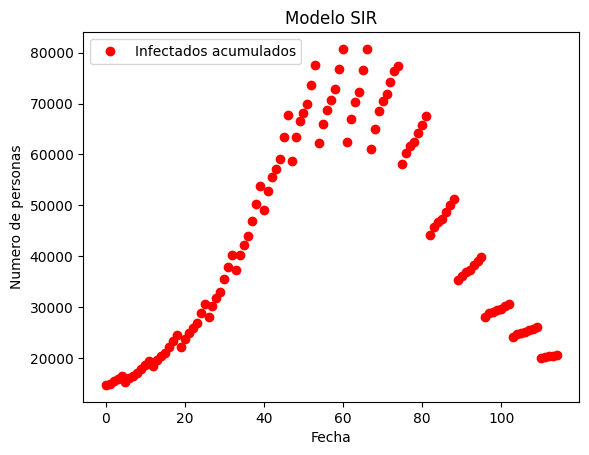

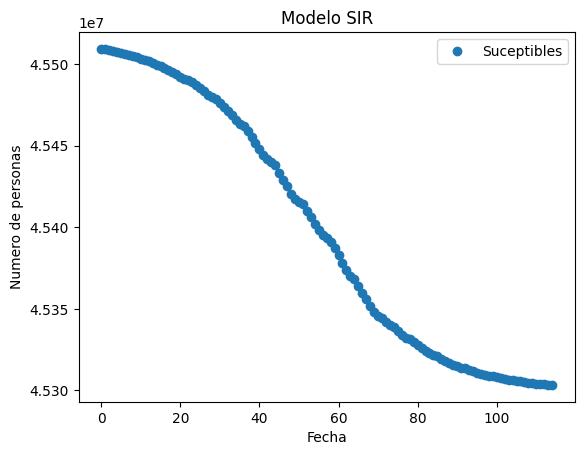

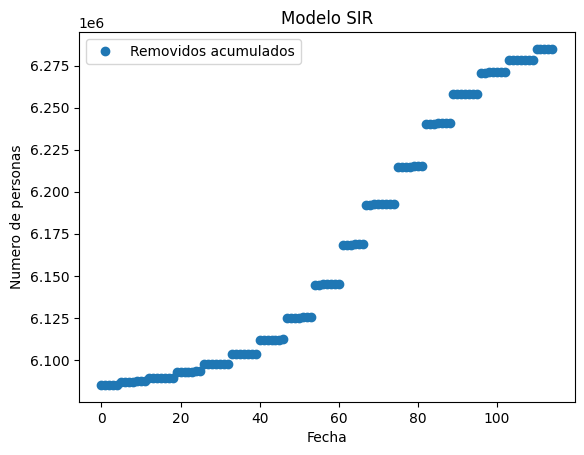

In [28]:
#graph the 3 dataframes in the same plot 
fig, ax = plt.subplots()
ax.plot(infectados_acumulados_filter,'o', label='Infectados acumulados', color='red')
#ax.plot(sucetibles_filter,'o', label='Suceptibles')
#ax.plot(removidos_acumulados_filter, 'o', label='Removidos acumulados')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

#graph the 3 dataframes in the same plot 
fig, ax = plt.subplots()
ax.plot(sucetibles_filter,'o', label='Suceptibles')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

#graph the 3 dataframes in the same plot 
fig, ax = plt.subplots()
ax.plot(removidos_acumulados_filter, 'o', label='Removidos acumulados')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()


## Suavisado:

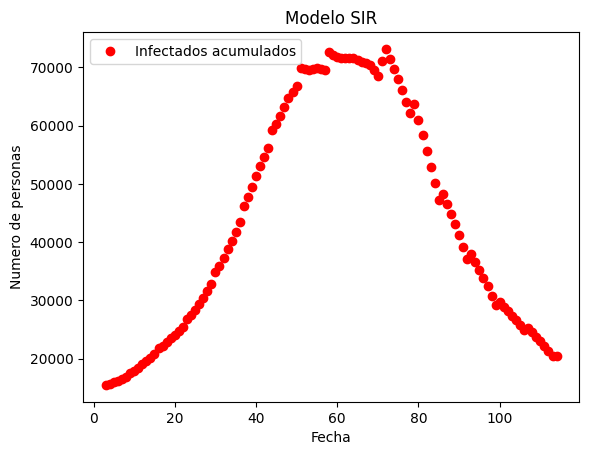

In [29]:
#el mismo del articulo
infected = [np.mean(infectados_acumulados_filter[i-3:i+3]) for i in infectados_acumulados_filter.index ]
#graph the 3 dataframes in the same plot 
fig, ax = plt.subplots()
ax.plot(infected,'o', label='Infectados acumulados', color='red')

ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

In [30]:
# Suavisando los datos: rolling mean
infectados_acumulados_filter['Numero de infectados'] = infectados_acumulados_filter['Numero de infectados'].rolling(window=7, min_periods=1, center=True).mean()
removidos_acumulados_filter['Numero de infectados'] = removidos_acumulados_filter['Numero de infectados'].rolling(window=7, min_periods=1, center=True).mean()
sucetibles_filter['Numero de infectados'] = sucetibles_filter['Numero de infectados'].rolling(window=7, min_periods=1, center=True).mean()

C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\524600025.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\524600025.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\oscar\AppData\Local\Temp\ipykernel_11692\524600025.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

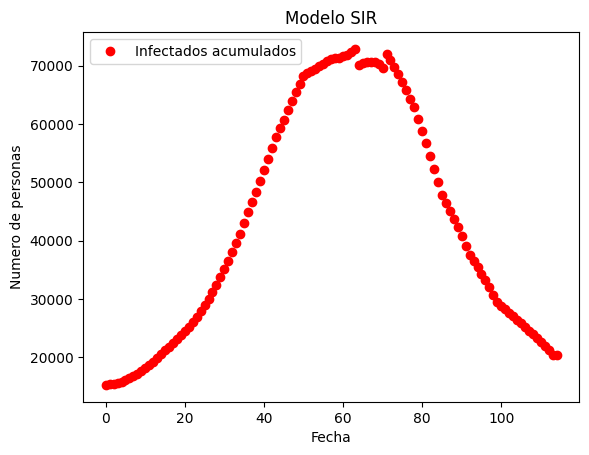

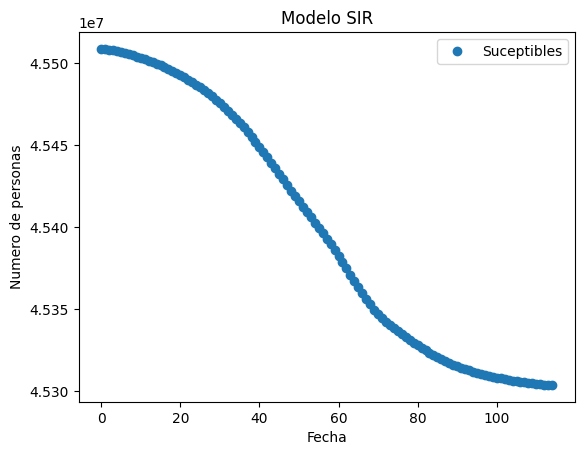

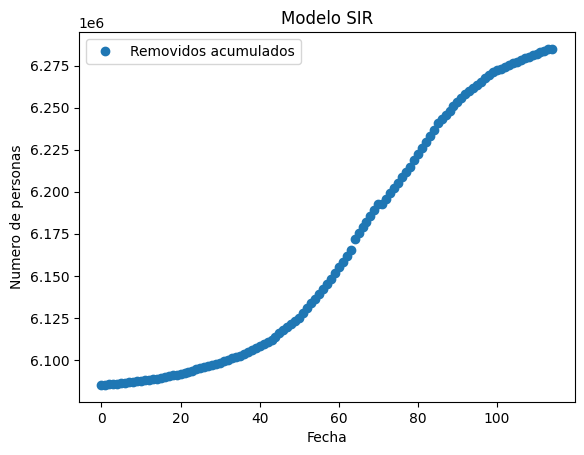

In [31]:
fig, ax = plt.subplots()
ax.plot(infectados_acumulados_filter,'o', label='Infectados acumulados', color='red')
#ax.plot(sucetibles_filter,'o', label='Suceptibles')
#ax.plot(removidos_acumulados_filter, 'o', label='Removidos acumulados')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

#graph the 3 dataframes in the same plot 
fig, ax = plt.subplots()
ax.plot(sucetibles_filter,'o', label='Suceptibles')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()

#graph the 3 dataframes in the same plot 
fig, ax = plt.subplots()
ax.plot(removidos_acumulados_filter, 'o', label='Removidos acumulados')
ax.set_xlabel('Fecha')
ax.set_ylabel('Numero de personas')
ax.set_title('Modelo SIR')
ax.legend()
plt.show()


In [32]:
#juntamos los 3 y guardamos en un archivo csv
sir_data = pd.concat([sucetibles_filter, infectados_acumulados_filter, removidos_acumulados_filter], axis=1)

# Cambiamos los títulos a S, I, R
sir_data.columns = ['S', 'I', 'R']

#COLOCAR al indice el titulo 't'
sir_data.index.name = 't'
sir_data.to_csv('colombia_data.csv')
sir_data


,S,I,R
t,,,
0,4.550860e+07,15273.750000,6.085123e+06
1,4.550836e+07,15503.000000,6.085138e+06
2,4.550807e+07,15480.000000,6.085449e+06
3,4.550777e+07,15556.714286,6.085675e+06
4,4.550722e+07,15817.857143,6.085959e+06
...,...,...,...
110,4.530425e+07,22624.714286,6.282125e+06
111,4.530399e+07,21942.285714,6.283066e+06
112,4.530386e+07,21311.666667,6.283833e+06
